
# Q-Learning Explanation

### Introduction: From Random Search with Memory to Q-Learning

You started with random search with memory, where the agent remembered paths that worked. This was okay for simple situations, but it struggled when the game got tricky—like when the Frozen Lake became slippery. If the agent slipped, the remembered path became useless, and the agent might get confused or crash.

### What Makes Q-Learning Different?

Q-Learning is smarter because it doesn't just memorize paths; it learns to make good decisions in any situation:

- **Generalization**: Q-Learning helps the agent figure out the best moves, even if things don't go as planned, like slipping on ice.
  
- **Adaptability**: The agent can adjust to changes and still make smart choices, even if it ends up in a different spot than expected.

- **Learning from Experience**: The agent learns from every move, win or lose, getting better each time it plays.

### Q-Learning Basics

Q-Learning helps the agent get better at a game by using a Q-table, which is like a cheat sheet. The table starts empty, but as the agent plays, it fills in with scores that show which moves are good and which aren't.

#### The Learning Equation

The agent updates the Q-table using this equation:

```python
q_table[state, action] = q_table[state, action] + learning_rate * (
    reward + discount_rate * np.max(q_table[new_state, :]) - q_table[state, action]
)
```

This equation helps the agent decide how to improve its cheat sheet based on what happened after it made a move.

#### Exploration vs. Exploitation

At first, the agent tries random moves to learn what works (exploration). As it gets smarter, it uses what it knows to make better choices (exploitation). Over time, it explores less and relies more on its learning. Here's how this looks in the code:

```python
epsilon = 1  # Start with full exploration
epsilon_decay_rate = 0.0001  # Slowly decrease exploration
rand_num_gen = np.random.default_rng()

# During the game
if rand_num_gen.random() < epsilon:
    action = env.action_space.sample()  # Explore: choose a random action
else:
    action = np.argmax(q_table[state, :])  # Exploit: choose the best-known action
```

As the agent learns, the `epsilon` value decreases:

```python
epsilon = max(epsilon - epsilon_decay_rate, 0)
```

This means the agent explores less and starts making decisions based on what it has learned.

### Numpy Functions in Q-Learning

- **np.zeros()**: Creates the Q-table, starting with zeros.

```python
q_table = np.zeros([env.observation_space.n, env.action_space.n])  # Initialize Q-table
```

- **rand_num_gen.random()**: Helps the agent decide whether to explore or exploit.

```python
if rand_num_gen.random() < epsilon:
    action = env.action_space.sample()  # Random action for exploration
```

- **np.argmax()**: Finds the best move based on what the agent has learned.

```python
action = np.argmax(q_table[state, :])  # Best known action for exploitation
```

- **np.max()**: Looks ahead to find the best possible reward from the agent's new position.

```python
reward + discount_rate * np.max(q_table[new_state, :])
```

# Assignment: implement the q table update equation and adjust hyper perameters

Bellow is the incomplete code for a q learning algorythm. for this assignment you need to first implement the q learning equation.

Secondly adjust the hyperperameters and notice the results by running the visuallizations in the last few cells.

In [7]:
import gymnasium as gym
import numpy as np

# Configurar el entorno Frozen Lake
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode='rgb_array')

# Inicializar variables para visualización
images = []
q_table_states = []

# Inicializar la tabla Q con ceros
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hiperparámetros con rangos de ajuste razonables
learning_rate = 0.9  # Tasa de aprendizaje (0.1 a 0.9)
discount_rate = 0.8  # Tasa de descuento (0.8 a 0.99)
epsilon = 1  # Tasa de exploración (0.1 a 1)
epsilon_decay_rate = 0.001  # Tasa de disminución de la exploración (0.0001 a 0.01)
rand_num_gen = np.random.default_rng()
episodes = 1000  # Número de episodios (500 a 10,000)

# Seguimiento de recompensas por episodio
rewards_per_episode = np.zeros(episodes)

for episode in range(episodes):
    state = env.reset()[0]
    terminated, truncated = False, False

    while not terminated and not truncated:
        # Exploración vs. Explotación
        if rand_num_gen.random() < epsilon:
            action = env.action_space.sample()  # Explorar
        else:
            action = np.argmax(q_table[state, :])  # Explotar

        new_state, reward, terminated, truncated, _ = env.step(action)

        # Paso 1: Implementar la ecuación de Q-learning
        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_rate * np.max(q_table[new_state, :]) - q_table[state, action]
        )
        # Guardar visualización solo en los primeros y últimos 100 episodios
        if episode <= 100 or episode > episodes - 100:
            images.append(env.render())
            q_table_states.append(q_table.copy())

        state = new_state

    # Reducir la tasa de exploración
    epsilon = max(epsilon - epsilon_decay_rate, 0)

    # Reducir la tasa de aprendizaje cuando la exploración termina
    if epsilon == 0:
        learning_rate = 0.0001

    # Seguimiento de recompensas para episodios exitosos
    if reward == 1:
        rewards_per_episode[episode] = 1

# Calcular la suma de recompensas en los últimos 100 episodios
sum_rewards = np.zeros(episodes)
for t in range(episodes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

env.close()


### Results

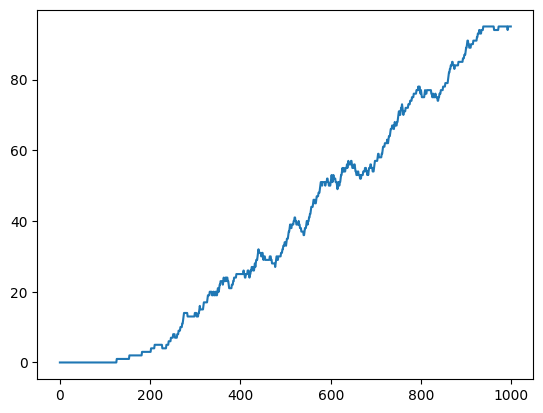

In [8]:
from matplotlib import pyplot as plt

plt.plot(sum_rewards)
plt.savefig('frozen_lake8x8.png')

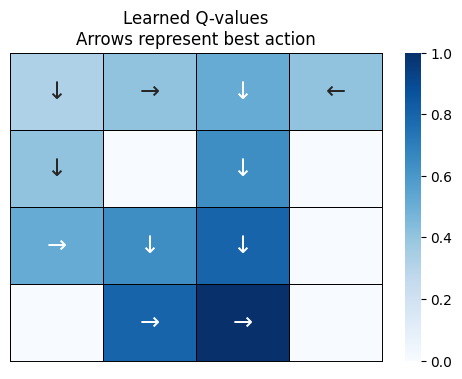

In [9]:
import sys
import os

# Add the parent directory to sys.path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.plotting import plot_q_values_grid

plot_q_values_grid(q_table, 4)

In [12]:
import sys
import os
from IPython.display import HTML

# Agrega el directorio principal a sys.path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.plotting import display_video

video = display_video(images[-20:], interval=50)
HTML(video.to_jshtml())